In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
datasets_path=r'archive'
folders=os.listdir(datasets_path)
print('Folders:', folders)

Folders: ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']


In [5]:
for folder in folders:
    folder_path=os.path.join(datasets_path,folder)
    num_images=len(folder_path)
    print(f'{folder} has {num_images} images')

Healthy has 15 images
Mild DR has 15 images
Moderate DR has 19 images
Proliferate DR has 22 images
Severe DR has 17 images


In [6]:
category='Healthy'
category_path=os.path.join(datasets_path,category)
image_files=os.listdir(category_path)

In [9]:
#to pick a random image
random_image=random.choice(image_files)
random_image_path=os.path.abspath(os.path.join(category_path,random_image))
print('Selected image paths:', random_image_path)

Selected image paths: C:\Users\fehin\schlscrape_project\Metalysix\diabetic_retinopathy\archive\Healthy\Healthy_829.png


In [10]:
#Load image
image=cv2.imread(random_image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

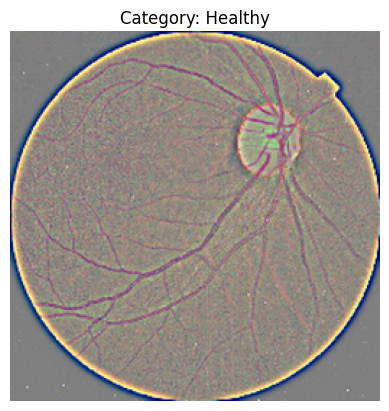

In [11]:
#Display the image
plt.imshow(image)
plt.axis('off')#To hide axis
plt.title(f'Category: {category}')
plt.show()

In [14]:
categories= ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR'] #select the 5 folders as  categories
#set up the display
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

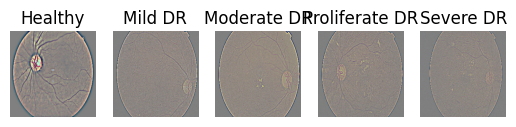

In [15]:
for i, category in enumerate(categories):
    category_path=os.path.join(datasets_path,category)
    image_files=os.listdir(category_path) #returns a list of each image file

    #To pick random images
    random_image=random.choice(image_files)
    random_image_path=os.path.abspath(os.path.join(category_path,random_image))
    
    #To load each image
    image=cv2.imread(random_image_path)

    #To convert BGR images to RGB
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    #Display images
    plt.subplot(1,5,i+1) #This creates 5 sections of 1 row, 5 columns
    plt.imshow(image) #show the image
    plt.axis('off')
    plt.title(category)

plt.show()
    

In [17]:
import seaborn as sns
#To pick randomly for the categories
category=random.choice(categories)
category_path=os.path.abspath(os.path.join(datasets_path,category))
random_category_files=os.listdir(category_path)
random_category_image=random.choice(random_category_files)
random_category_image_path=os.path.abspath(os.path.join(category_path,random_category_image))
print(random_category_image_path)

C:\Users\fehin\schlscrape_project\Metalysix\diabetic_retinopathy\archive\Mild DR\Mild_DR_323.png


In [20]:
image=cv2.imread(random_category_image_path) #this loads the image
cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #This uses the cvtColor to convert the image format from BGR to RGB
r,g,b=cv2.split(image) #This uses the split method to separate the images into RGB layers

Text(0.5, 1.0, 'Color Histogram for Mild DR')

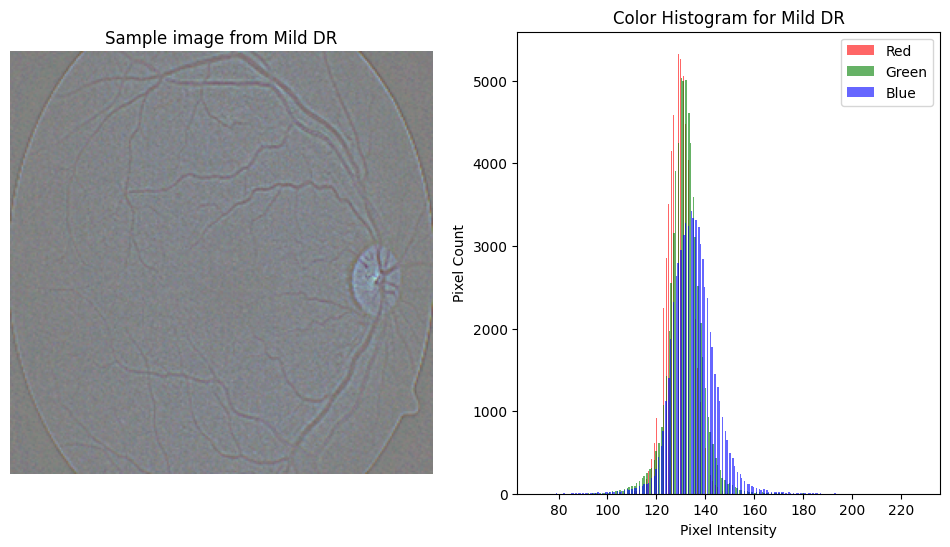

In [24]:
#To plot the histograms for each color channel
plt.figure(figsize=(12,6)) #this sets our blank space sizes to 12 inches wide and 6 inches tall  for the images to be drawn
plt.subplot(1,2,1) #This sets the grid to 1 row, 2 columns, position 1
plt.imshow(image)
plt.axis('off')
plt.title(f'Sample image from {category}')
plt.subplot(1,2,2) #This sets our second frame to the first row, second column(side-by-side with the first img), second position
#Hist characteristics
plt.hist(r.ravel(),bins=256, alpha=0.6,color='red',label='Red')
plt.hist(g.ravel(), bins=256,alpha=0.6,color='green',label='Green')
plt.hist(b.ravel(),bins=256,alpha=0.6,color='blue',label='Blue')
'''The ravel flattens the red channel to 1D list of pixel values,
bins divides the pixel values into 0-256, alpha makes the hist bars a bit transparent so tthat the other hist can overlap'''
#adding axes labels
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.legend()
plt.title(f'Color Histogram for {category}')

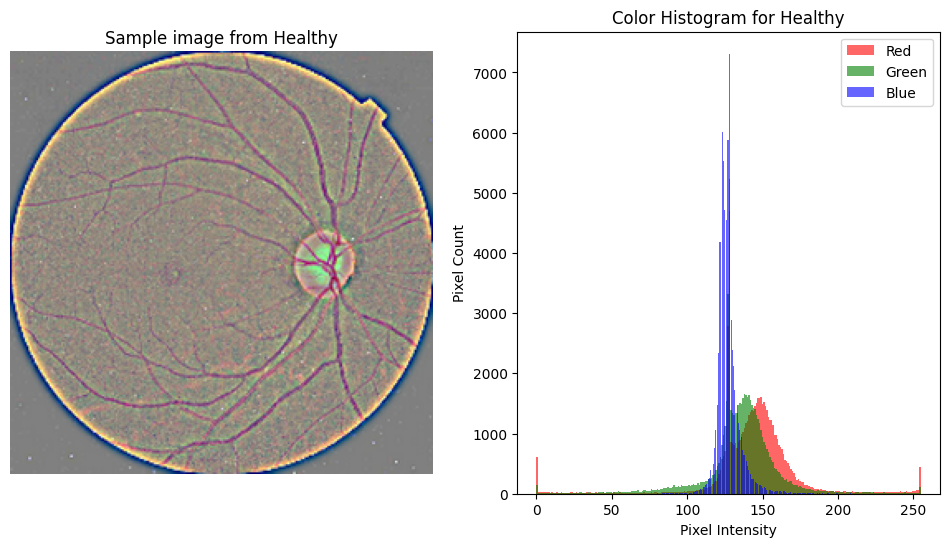

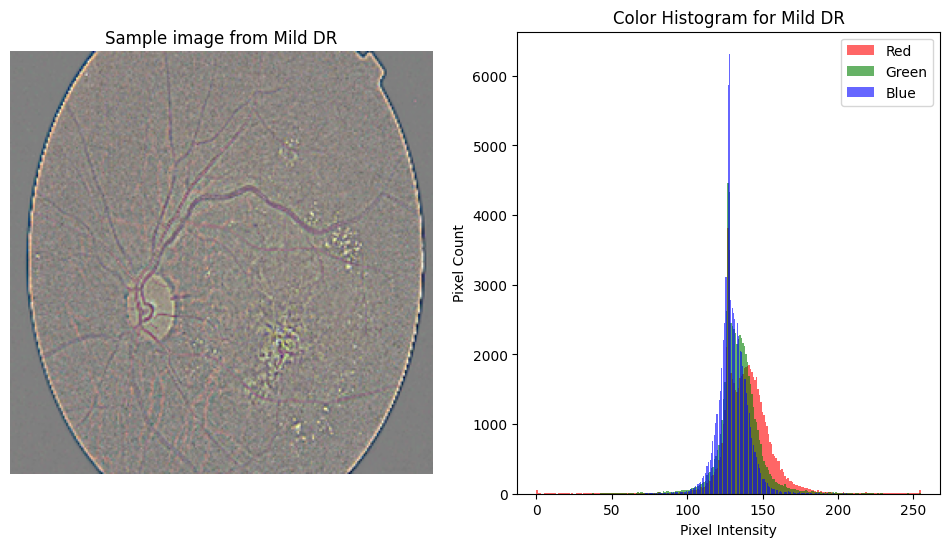

C:\Users\fehin\schlscrape_project\scrape_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


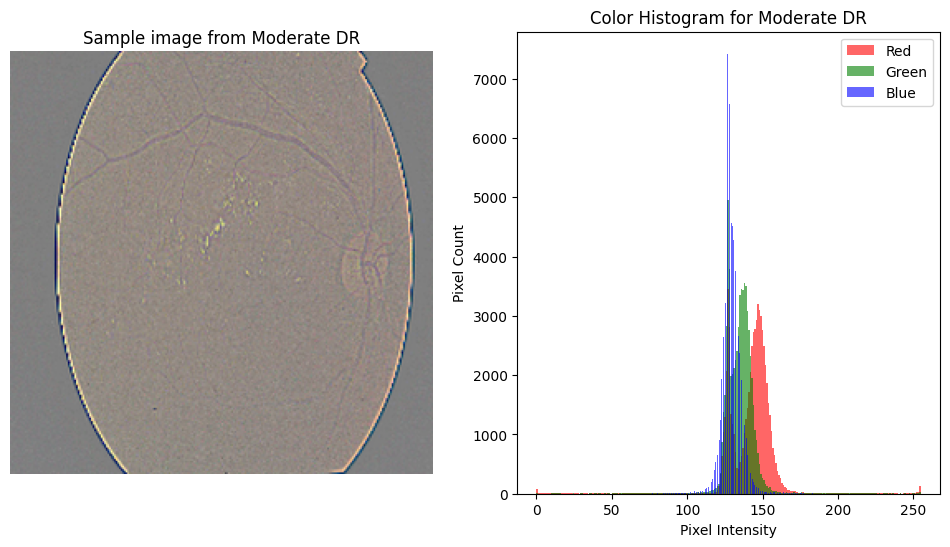

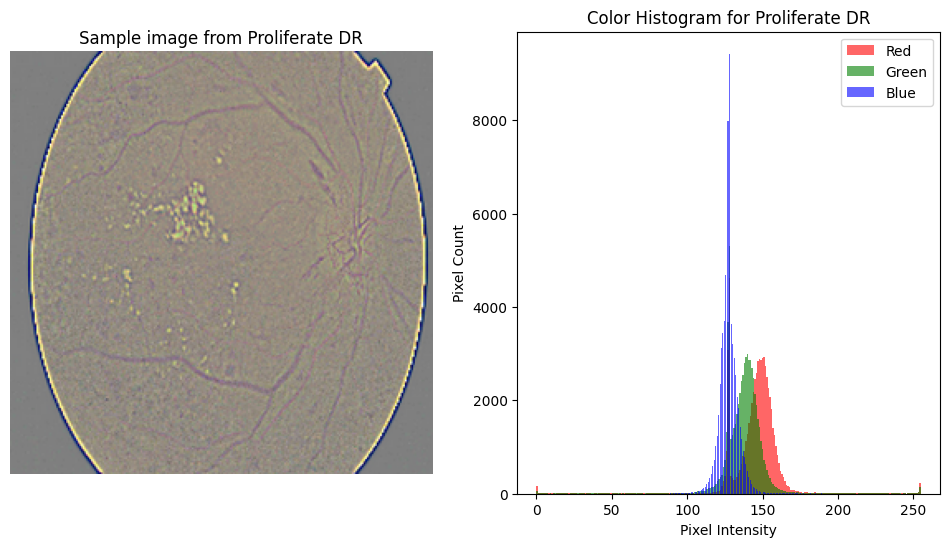

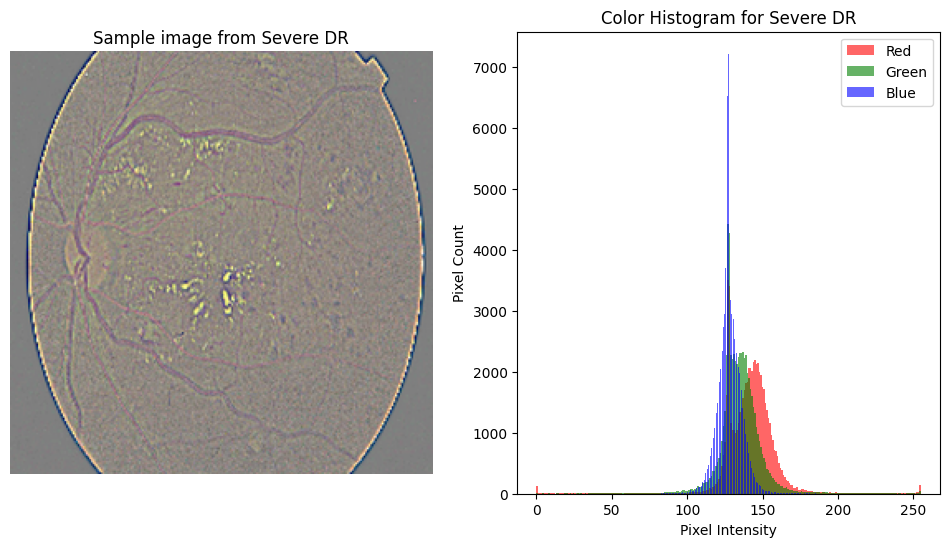

In [26]:
categories= ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
for i,each_category in enumerate(categories):
    each_category_path=os.path.abspath(os.path.join(datasets_path,each_category)) #path for each folder
    image_files_list=os.listdir(each_category_path) #returns list of each folder dir
    
    random_image_files=random.choice(image_files_list) #picks random images
    random_image_files_path=os.path.abspath(os.path.join(each_category_path,random_image_files)) #each folder image path
    
    loaded_image=cv2.imread(random_image_files_path) #Loads the image
    converted_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB) #converts color from BGR to RGB

    r,g,b=cv2.split(converted_image) #splits the image colors to r,g,b
    #plot info
    plt.figure(figsize=(12,6)) #this sets the width (12 inches) and height (6 inches)
    plt.subplot(1,2,1) #this sets the subplot for the first image
    plt.imshow(converted_image) #displays the image
    plt.axis('off')
    plt.title(f'Sample image from {each_category}') 
    plt.subplot(1,2,2) #this sets the subplot for the second image
    #Hist plot
    plt.hist(r.ravel(), bins=256, alpha=0.6, color='red', label='Red')
    plt.hist(g.ravel(),bins=256,alpha=0.6,color='green',label='Green')
    plt.hist(b.ravel(), bins=256, alpha=0.6, color='blue', label='Blue')
    plt.legend()
    #axes label
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.title(f'Color Histogram for {each_category}')
    

In [28]:
import numpy as np
severity_mapping={
    'Healthy':0,'Mild DR':1,'Moderate DR':2, 'Proliferate DR':3, 'Severe DR':4
} #creating a dictionary and mapping it to a numerical severity level

In [38]:
data=[]
datasets_path=r'archive'
for i, category in enumerate(severity_mapping.keys()):
    category_path=os.path.abspath(os.path.join(datasets_path,category)) #path for the mapped folders
    cat_folder=os.listdir(category_path)

    for each_image in cat_folder:
        each_image_path=os.path.join(category_path,each_image) #pat for each image

        loaded_image=cv2.imread(each_image_path) #load image
        converted_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB) #convert image

        #To calculate the average intensity for red, blue, and green
        average_red=np.mean(converted_image[:,:,0])
        average_green=np.mean(converted_image[:,:,1])
        average_blue=np.mean(converted_image[:,:,2])

        #To store the extracted information
        data.append([each_image,average_red,average_green,average_blue,severity_mapping[category]])
#To convert the data to dataframe
df=pd.DataFrame(data,columns=['Image','Red','Green','Blue','Severity'])
df.head()

,Image,Red,Green,Blue,Severity
0,Healthy.png,143.055969,134.614426,127.322357,0
1,Healthy_10.png,143.172607,133.781357,127.331924,0
2,Healthy_100.png,137.572327,134.941956,132.649689,0
3,Healthy_1000.png,136.058319,133.575699,132.344177,0
4,Healthy_101.png,141.991592,134.739838,129.608383,0


In [45]:
df['Image'].value_counts()

Image
Healthy.png            1
Moderate_DR_519.png    1
Moderate_DR_511.png    1
Moderate_DR_512.png    1
Moderate_DR_513.png    1
                      ..
Healthy_925.png        1
Healthy_926.png        1
Healthy_927.png        1
Healthy_928.png        1
Severe DR_99.png       1
Name: count, Length: 2750, dtype: int64

In [40]:
#Computing the correlation matrix
correlation_matrix=df[['Red','Green','Blue','Severity']].corr()
correlation_matrix

,Red,Green,Blue,Severity
Red,1.000000,0.801935,-0.114742,0.048091
Green,0.801935,1.000000,0.357970,0.057050
Blue,-0.114742,0.357970,1.000000,0.059697
Severity,0.048091,0.057050,0.059697,1.000000


In [43]:
#Creating new columns for color ratios
df['Red_Green_Ratio']=df['Red']/df['Green']
df['Red_Blue_Ratio']=df['Red']/df['Blue']
df['Blue_Green_Ratio']=df['Blue']/df['Green']

correlation_matrix_2=df[['Red_Green_Ratio','Red_Blue_Ratio','Blue_Green_Ratio','Severity']].corr()
correlation_matrix_2

,Red_Green_Ratio,Red_Blue_Ratio,Blue_Green_Ratio,Severity
Red_Green_Ratio,1.000000,0.946269,-0.772744,0.028963
Red_Blue_Ratio,0.946269,1.000000,-0.936209,0.014356
Blue_Green_Ratio,-0.772744,-0.936209,1.000000,-0.000835
Severity,0.028963,0.014356,-0.000835,1.000000


In [44]:
df.describe()

,Red,Green,Blue,Severity,Red_Green_Ratio,Red_Blue_Ratio,Blue_Green_Ratio
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,140.020154,133.973755,129.366478,1.381818,1.045028,1.082584,0.965735
std,3.658564,1.872913,1.723026,1.260690,0.017901,0.033030,0.014905
min,130.835068,128.825684,126.913773,0.000000,0.997284,0.999539,0.914168
25%,136.913250,132.642296,128.129116,0.000000,1.031019,1.057103,0.954227
50%,140.637589,134.001434,128.858139,2.000000,1.048128,1.086956,0.965558
75%,142.954330,135.276928,130.108788,2.000000,1.058651,1.109265,0.975985
max,153.865082,141.954742,139.981003,4.000000,1.114149,1.184237,1.004365
